In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    ConfusionMatrixDisplay,
    RocCurveDisplay,
    classification_report
)
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings(
    "ignore", category=DeprecationWarning
)  # to avoid deprecation warnings

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=[
        "#4B9AC7",
        "#4BE8E0",
        "#9DD4F3",
        "#97FBF6",
        "#2A7FAF",
        "#23B1AB",
        "#0E3449",
        "#015955",
    ]
)
pio.templates.default = "jedha"
pio.renderers.default = "svg"

In [3]:
# Import dataset
print("Loading dataset...")
dataset = pd.read_csv("src/bl.txt")
print("Dataset loaded successfully.")
print(f"Shape of dataset: {dataset.shape}")
print("First 5 rows:")
print(dataset.head())
print()

Loading dataset...
Dataset loaded successfully.
Shape of dataset: (625, 5)
First 5 rows:
  balance  left_weight  left_distance  right_weight  right_distance
0       B            1              1             1               1
1       R            1              1             1               2
2       R            1              1             1               3
3       R            1              1             1               4
4       R            1              1             1               5



In [4]:
# Basic statistics and dataset overview
print("Dataset Overview:")
print(f"Number of rows: {dataset.shape[0]}")
print(f"Number of columns: {dataset.shape[1]}")
print()

# Display first few rows of the dataset
print("Preview of the dataset:")
display(dataset.head())
print()

# Basic statistics
print("Basic statistics for numerical and categorical columns:")
data_desc = dataset.describe(include="all")
display(data_desc)
print()

# Percentage of missing values for each column
print("Percentage of missing values in each column:")
missing_values = 100 * dataset.isnull().sum() / dataset.shape[0]
display(missing_values)

Dataset Overview:
Number of rows: 625
Number of columns: 5

Preview of the dataset:


,balance,left_weight,left_distance,right_weight,right_distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5



Basic statistics for numerical and categorical columns:


,balance,left_weight,left_distance,right_weight,right_distance
count,625,625.000000,625.000000,625.000000,625.000000
unique,3,NaN,NaN,NaN,NaN
top,R,NaN,NaN,NaN,NaN
freq,288,NaN,NaN,NaN,NaN
mean,NaN,3.000000,3.000000,3.000000,3.000000
std,NaN,1.415346,1.415346,1.415346,1.415346
min,NaN,1.000000,1.000000,1.000000,1.000000
25%,NaN,2.000000,2.000000,2.000000,2.000000
50%,NaN,3.000000,3.000000,3.000000,3.000000
75%,NaN,4.000000,4.000000,4.000000,4.000000



Percentage of missing values in each column:


balance           0.0
left_weight       0.0
left_distance     0.0
right_weight      0.0
right_distance    0.0
dtype: float64

In [5]:
dataset.balance.value_counts()
# dataset["balance"].value_counts()

balance
R    288
L    288
B     49
Name: count, dtype: int64

# Preprocessing

In [6]:
# Separate target variable Y from features X
print("Separating labels from features...")
target_variable = "balance"

X = dataset.drop(columns=[target_variable])
Y = dataset[target_variable]

print("...Done.")
print()

print("Y (Target variable):")
print(Y.head())
print("\nX (Features):")
print(X.head())

Separating labels from features...
...Done.

Y (Target variable):
0    B
1    R
2    R
3    R
4    R
Name: balance, dtype: object

X (Features):
   left_weight  left_distance  right_weight  right_distance
0            1              1             1               1
1            1              1             1               2
2            1              1             1               3
3            1              1             1               4
4            1              1             1               5


In [7]:
# Divide dataset into Train and Test sets
print("Dividing dataset into train and test sets...")
# Using stratify=Y to ensure balanced class distribution in both sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42, stratify=Y
)
print("Dataset division complete.")
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print()

Dividing dataset into train and test sets...
Dataset division complete.
Training set size: 437 samples
Test set size: 188 samples



In [8]:
type(Y_train)

pandas.core.series.Series

# Comparing Decision Trees: Gini or Entropy Criterion?

In [9]:
# Automatically detect names of numeric and categorical columns
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X.select_dtypes(exclude=["int64", "float64"]).columns.tolist()

print("Found numeric features:", numeric_features)
print("Found categorical features:", categorical_features)

Found numeric features: ['left_weight', 'left_distance', 'right_weight', 'right_distance']
Found categorical features: []


In [10]:
# Transformer Y en valeur binaire
encoder = LabelEncoder()
Y_train = encoder.fit_transform(Y_train)
Y_test = encoder.fit_transform(Y_test)

print(Y_train[:5])
print(Y_test[:5])

[2 2 2 1 2]
[2 1 2 2 1]


In [11]:
gini_classifier = DecisionTreeClassifier()
gini_classifier

DecisionTreeClassifier()

In [12]:
gini_classifier.fit(X_train, Y_train)

DecisionTreeClassifier()

In [13]:
X_train.columns

Index(['left_weight', 'left_distance', 'right_weight', 'right_distance'], dtype='object')

In [14]:
# pour voir les valeurs dans une colonne, ici dans Y_train
unique_values, counts = np.unique(Y_train, return_counts=True)
# unique_values, _ = np.unique(Y_train, return_counts=True) => pour ignorer le counts et éviter le dictionnaire

print("Valeurs uniques:", unique_values)
print("Comptes:", counts)

Valeurs uniques: [0 1 2]
Comptes: [ 34 201 202]


In [15]:
# on veut désencoder pour faire apparaître le nom des classes dans le plot tree
class_names = encoder.inverse_transform([0, 1, 2])

print("Class Names:", class_names)

Class Names: ['B' 'L' 'R']


In [16]:
encoder.classes_

array(['B', 'L', 'R'], dtype=object)

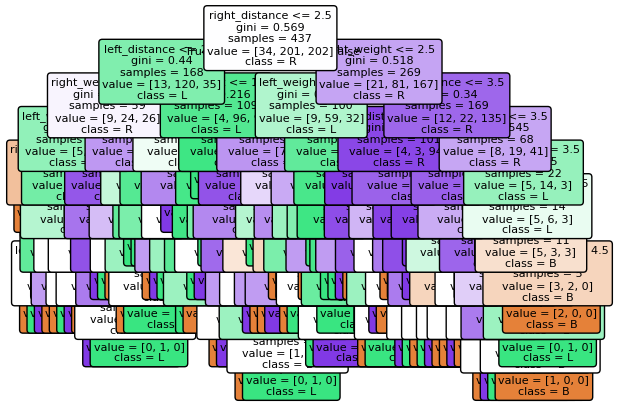

In [17]:
display_tree = plot_tree(gini_classifier, filled=True ,rounded=True, fontsize=8, feature_names=X_train.columns, class_names=class_names)

In [18]:
entropy_classifier = DecisionTreeClassifier(criterion="entropy")
entropy_classifier

DecisionTreeClassifier(criterion='entropy')

In [19]:
entropy_classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy')

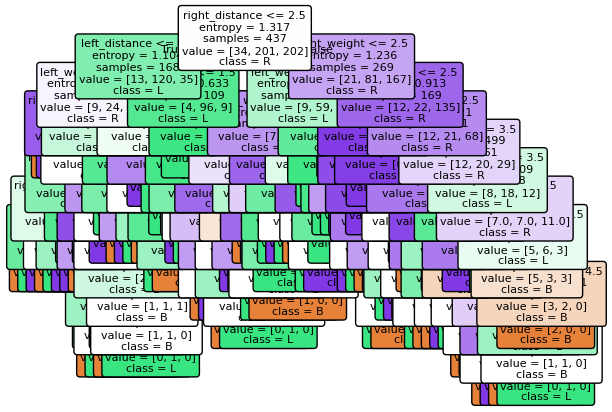

In [20]:
display_tree = plot_tree(entropy_classifier, filled=True ,rounded=True, fontsize=8, feature_names=X_train.columns, class_names=class_names)

In [21]:
# Prédictions sur une ligne virtuelle
print("Making predictions X_new...")
X_new = pd.DataFrame(data=[[4, 4, 3, 3]], columns=X_train.columns)
Y_train_pred = entropy_classifier.predict(X_new)
print("Predictions completed.")
print(" X_new. predictions:", Y_train_pred)
print()

Making predictions X_new...
Predictions completed.
 X_new. predictions: [1]



In [22]:
# on veut désencoder pour faire apparaître le nom des classes dans le plot tree
class_names = encoder.inverse_transform([1])

print("Class Names:", class_names)

Class Names: ['L']


In [23]:
# Prédictions sur une ligne virtuelle
print("Making predictions X_new...")
Y_train_pred = gini_classifier.predict(X_new)
print("Predictions completed.")
print(" X_new. predictions:", Y_train_pred)
print()

Making predictions X_new...
Predictions completed.
 X_new. predictions: [1]



In [24]:
# on veut désencoder pour faire apparaître le nom des classes dans le plot tree
class_names = encoder.inverse_transform([1])

print("Class Names:", class_names)

Class Names: ['L']


In [25]:
# Prédictions sur une ligne virtuelle
print("Making predictions on the test set...")
Y_test_gini_pred = gini_classifier.predict(X_test)
print("Predictions completed.")
print("test set predictions:", Y_test_gini_pred)
print()

Making predictions on the test set...
Predictions completed.
test set predictions: [2 1 0 2 1 2 2 2 0 1 2 2 0 0 2 1 1 1 1 2 2 2 1 2 2 0 2 0 1 2 2 1 2 1 2 2 0
 2 2 2 1 0 1 1 1 1 2 2 2 1 0 1 1 1 2 1 2 1 2 2 1 1 2 1 2 1 0 1 1 0 1 1 1 2
 1 1 2 0 2 1 1 1 2 2 1 1 1 2 0 1 1 1 1 2 1 2 1 1 2 1 2 1 1 1 1 1 1 2 0 1 2
 1 2 1 1 1 2 0 1 2 1 1 1 2 1 1 0 2 1 0 2 1 2 2 0 2 1 2 1 1 1 1 2 1 1 1 2 2
 0 1 2 2 0 1 1 2 2 2 2 2 0 1 1 2 1 2 1 1 0 1 2 1 1 1 0 1 2 0 1 0 2 2 1 0 1
 0 0 2]



In [26]:
# Prédictions sur une ligne virtuelle
print("Making predictions on the test set...")
Y_test_entropy_pred = entropy_classifier.predict(X_test)
print("Predictions completed.")
print("test set predictions:", Y_test_entropy_pred)
print()

Making predictions on the test set...
Predictions completed.
test set predictions: [2 1 2 2 1 2 2 2 0 1 2 2 0 0 2 1 1 1 1 2 0 2 1 2 2 0 0 0 1 2 2 1 2 1 2 2 0
 2 2 2 1 0 2 1 1 0 2 2 2 1 0 1 1 1 2 1 2 0 1 2 1 1 0 1 2 1 2 1 1 0 0 1 1 2
 1 1 2 1 0 1 1 1 2 2 1 1 1 2 0 1 1 1 1 2 1 2 1 1 2 1 2 1 1 1 1 1 1 2 0 1 2
 1 2 1 0 2 2 0 1 2 1 1 2 2 1 2 0 2 1 2 2 1 2 2 0 2 1 2 1 1 1 1 2 1 1 1 0 2
 0 1 2 2 0 1 1 2 2 2 2 2 2 1 1 2 1 2 1 0 0 1 2 1 1 1 0 1 2 0 1 0 2 2 1 0 1
 0 0 2]



In [27]:
A=Y_test_gini_pred
B=Y_test_entropy_pred

c=0
for a, b in zip(A,B):
  if a != b:
    c +=1
print(c)

20


In [28]:
gini_classifier.score(X_test, Y_test)

0.7340425531914894

In [30]:
entropy_classifier.score(X_test, Y_test)

0.723404255319149

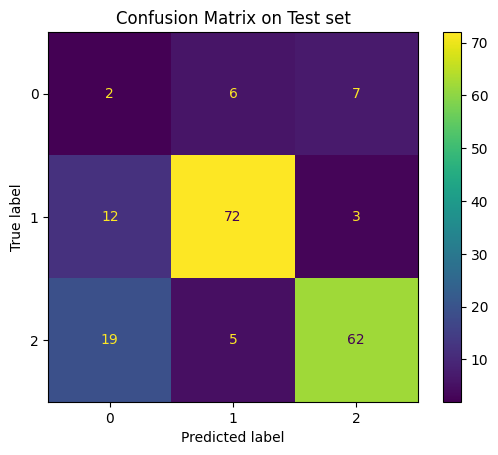

In [31]:
# Visualize confusion matrices
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(entropy_classifier, X_test, Y_test, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

--> Most errors correspond to examples of class 'B' that are misclassified as 'R' or 'L'

In [33]:
print(classification_report(y_true = Y_test, y_pred=entropy_classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.06      0.13      0.08        15
           1       0.87      0.83      0.85        87
           2       0.86      0.72      0.78        86

    accuracy                           0.72       188
   macro avg       0.60      0.56      0.57       188
weighted avg       0.80      0.72      0.76       188



In [34]:
print(classification_report(y_true = Y_train, y_pred = entropy_classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00       201
           2       1.00      1.00      1.00       202

    accuracy                           1.00       437
   macro avg       1.00      1.00      1.00       437
weighted avg       1.00      1.00      1.00       437



In [35]:
print(classification_report(y_true = Y_test, y_pred=gini_classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.04      0.07      0.05        15
           1       0.81      0.84      0.82        87
           2       0.91      0.74      0.82        86

    accuracy                           0.73       188
   macro avg       0.59      0.55      0.56       188
weighted avg       0.80      0.73      0.76       188



In [36]:
print(classification_report(y_true = Y_train, y_pred = gini_classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00       201
           2       1.00      1.00      1.00       202

    accuracy                           1.00       437
   macro avg       1.00      1.00      1.00       437
weighted avg       1.00      1.00      1.00       437



# Fighting overfitting

How would you fight overfitting while still using decision tree classifiers? Try to find the set of hyper parameters that maximizes the performances of the model on the test set. Did the model perform better ? Are there still ways to improve the model?

In [37]:
rtc = DecisionTreeClassifier()
params = {'max_depth' : np.arange(1,10),
         'min_samples_split' : [2, 5, 10, 20]}

grid =  GridSearchCV(estimator=rtc, param_grid= params, cv = 10)
grid.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': [2, 5, 10, 20]})

In [38]:
print('Classification report on train set:')
print(classification_report(Y_train, grid.best_estimator_.predict(X_train)))

Classification report on train set:
              precision    recall  f1-score   support

           0       0.67      0.06      0.11        34
           1       0.87      0.89      0.88       201
           2       0.82      0.93      0.87       202

    accuracy                           0.84       437
   macro avg       0.79      0.63      0.62       437
weighted avg       0.83      0.84      0.82       437



In [39]:
print('Classification report on test set:')
print(classification_report(Y_test, grid.best_estimator_.predict(X_test)))

Classification report on test set:
              precision    recall  f1-score   support

           0       0.20      0.07      0.10        15
           1       0.80      0.83      0.81        87
           2       0.77      0.84      0.80        86

    accuracy                           0.77       188
   macro avg       0.59      0.58      0.57       188
weighted avg       0.74      0.77      0.75       188



# Feature engineering

Try and create new variables in order to improve the model's performance. Make again the preprocessings. And train a new model with gini criterion.

In [40]:
dataset['left_prod'] = dataset['left_weight'] * dataset['left_distance']
dataset['right_prod'] = dataset['right_weight'] * dataset['right_distance']
dataset['balanced'] = dataset['right_prod'] - dataset['left_prod']

In [41]:
# Separate target variable Y from features X
print("Separating labels from features...")
target_variable = "balance"

X = dataset.drop(columns=[target_variable])
Y = dataset[target_variable]

print("...Done.")
print()

print("Y (Target variable):")
print(Y.head())
print("\nX (Features):")
print(X.head())

Separating labels from features...
...Done.

Y (Target variable):
0    B
1    R
2    R
3    R
4    R
Name: balance, dtype: object

X (Features):
   left_weight  left_distance  right_weight  right_distance  left_prod  \
0            1              1             1               1          1   
1            1              1             1               2          1   
2            1              1             1               3          1   
3            1              1             1               4          1   
4            1              1             1               5          1   

   right_prod  balanced  
0           1         0  
1           2         1  
2           3         2  
3           4         3  
4           5         4  


In [42]:
# Divide dataset into Train and Test sets
print("Dividing dataset into train and test sets...")
# Using stratify=Y to ensure balanced class distribution in both sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42, stratify=Y
)
print("Dataset division complete.")
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print()

Dividing dataset into train and test sets...
Dataset division complete.
Training set size: 437 samples
Test set size: 188 samples



In [43]:
gini_classifier = DecisionTreeClassifier()
gini_classifier.fit(X_train, Y_train)
gini_classifier

DecisionTreeClassifier()

In [44]:
print(classification_report(Y_train, gini_classifier.predict(X_train)))
print(classification_report(Y_test, gini_classifier.predict(X_test)))

              precision    recall  f1-score   support

           B       1.00      1.00      1.00        34
           L       1.00      1.00      1.00       201
           R       1.00      1.00      1.00       202

    accuracy                           1.00       437
   macro avg       1.00      1.00      1.00       437
weighted avg       1.00      1.00      1.00       437

              precision    recall  f1-score   support

           B       1.00      1.00      1.00        15
           L       1.00      1.00      1.00        87
           R       1.00      1.00      1.00        86

    accuracy                           1.00       188
   macro avg       1.00      1.00      1.00       188
weighted avg       1.00      1.00      1.00       188



The conclusion to this exercise is that even though decision trees can be very high variance models able to model non-linear links between the target variable and the explanatory variables it still has very high constrains on how it can model the data. It separates the explanatory variables space into "squares" that carry different predictions for the target variable.